# Project : Air Bnb New York 

> - Data cleaning (removing outlier, change format
> - Data analyst
> - Data Visualisation

<span style="color: rgb(201, 209, 217); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; background-color: rgb(13, 17, 23);">Use this air bnb new york city&nbsp;</span> [data set](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data) <span style="color: rgb(201, 209, 217); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;; font-size: 16px; background-color: rgb(13, 17, 23);">&nbsp;and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.</span>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn  

In [5]:
df = pd.read_csv(r'E:\Portofolio\Sql Project 4\Data\AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

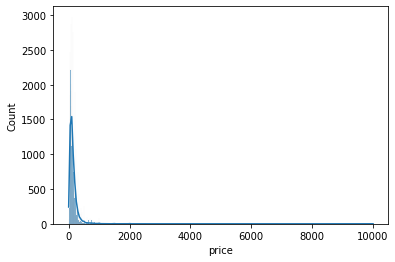

<AxesSubplot:xlabel='price', ylabel='Count'>

In [77]:
sn.histplot(df.price, kde=True)

## Remove outlier using percentile

In [7]:
lower,upper = df.price.quantile([0.1,0.9]) ## using percentile to define boundary of outlier min 10% and max 90%
lower,upper 

(49.0, 269.0)

In [8]:
df_out = df[(df.price<lower) | (df.price>upper)] ## Outlier
df_out.shape, df.shape

((9560, 16), (48895, 16))

In [9]:
df2 = df[(df.price>lower) & (df.price<upper)] ## New table no outlier
df2.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
477,167482,Charming upper west side apartment,789257,Barbara,Manhattan,Upper West Side,40.77886,-73.98042,Entire home/apt,185,2,129,2019-06-07,1.33,1,14
21799,17520883,Exciting New York Get Away,101672721,Telisha,Manhattan,Harlem,40.81780,-73.93774,Private room,125,1,0,NaN,NaN,1,0
9973,7669319,"Sunny Studio, Amazing Neighborhood",2048347,Andrea,Brooklyn,Prospect Heights,40.67293,-73.96678,Entire home/apt,99,7,11,2019-06-15,0.23,1,216
25108,20120690,Modern Williamsburg Penthouse,9691202,Julien,Brooklyn,Williamsburg,40.71880,-73.94283,Entire home/apt,250,7,10,2019-05-25,0.45,1,5
9335,7132891,Bohemian & Chic Apartment.,23988743,Rachid,Brooklyn,Bushwick,40.69319,-73.92375,Private room,75,2,22,2019-06-04,0.46,1,362
46445,35257081,Private Room in Manhattan 15 min. from Midtown!,265424495,Benat,Manhattan,Harlem,40.80486,-73.94754,Private room,50,1,7,2019-06-30,5.83,2,267
15920,12869662,Bright Williamsburg Loft w Balcony,8636489,Evan,Brooklyn,Williamsburg,40.71701,-73.95685,Entire home/apt,250,5,14,2018-07-01,0.41,1,0
41559,32306527,RM#2-Bright room w/balcony 30 mins NYC & airports,241963980,Deborah,Queens,Jamaica Hills,40.71686,-73.79742,Private room,67,2,25,2019-07-07,6.88,2,318
11563,8993871,"Sunny bedroom with balcony, Queens",46979077,Maya,Queens,Elmhurst,40.74085,-73.89022,Private room,65,1,123,2019-06-22,2.76,2,333
34387,27277107,Cozy East Village Room,930201,Lilian,Manhattan,East Village,40.72817,-73.97730,Private room,81,5,9,2019-07-06,0.97,1,110


In [10]:
df2.price.describe()

count    38957.00000
mean       121.60708
std         55.45717
min         50.00000
25%         75.00000
50%        107.00000
75%        155.00000
max        268.00000
Name: price, dtype: float64

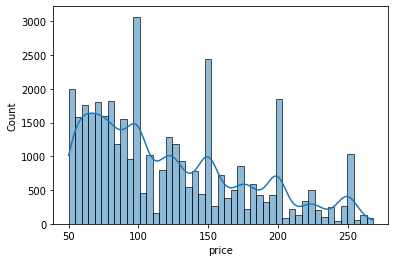

<AxesSubplot:xlabel='price', ylabel='Count'>

In [11]:
sn.histplot(df2.price, kde=True)

## Find missing value on new dataframe

In [94]:
df2.shape, df2.isnull().sum(), df2.duplicated().sum()

((38957, 16),
 id                                   0
 name                                12
 host_id                              0
 host_name                           17
 neighbourhood_group                  0
 neighbourhood                        0
 latitude                             0
 longitude                            0
 room_type                            0
 price                                0
 minimum_nights                       0
 number_of_reviews                    0
 last_review                       7400
 reviews_per_month                 7400
 calculated_host_listings_count       0
 availability_365                     0
 dtype: int64,
 0)

In [12]:
df3 = df2.dropna()

In [16]:
df3.shape, df3.isnull().sum(), df3.duplicated().sum()

((31538, 16),
 id                                0
 name                              0
 host_id                           0
 host_name                         0
 neighbourhood_group               0
 neighbourhood                     0
 latitude                          0
 longitude                         0
 room_type                         0
 price                             0
 minimum_nights                    0
 number_of_reviews                 0
 last_review                       0
 reviews_per_month                 0
 calculated_host_listings_count    0
 availability_365                  0
 dtype: int64,
 0)

In [19]:
df3.shape

(31538, 16)